Task 3 : Iris Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#This is data acquistion step
from sklearn.datasets import load_iris

data = load_iris()
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
#Extracting the data
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
names = data.target_names
names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df["target"]  =data.target
df["target_names"] =df.target.apply(lambda x : names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
df0 = df[df["target"] == 0]
df1 = df[df["target"] == 1]
df2 = df[df["target"] == 2]

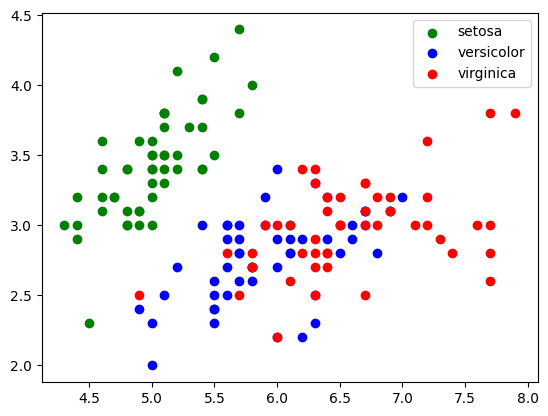

In [7]:
#Visualising the data in plot graph
%matplotlib inline

plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], color="g", label = names[0])
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], color="b", label = names[1])
plt.scatter(df2["sepal length (cm)"], df2["sepal width (cm)"], color="r", label = names[2])
plt.legend()
plt.show()

In [8]:
X = df.drop(["target", "target_names"], axis=1)
y = df.target
X.shape, y.shape

((150, 4), (150,))

In [9]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
models = {
    "svc" : {
        "name": SVC(gamma ="auto"),
        "params": {
            "C" : [1, 5, 15],
            "kernel" : ["linear", "poly", "rbf"]
        }
    },
    
    "Random Forest": {
        "name": RandomForestClassifier(),
        "params": {
            "n_estimators" : [5, 15, 100]
        }
    },
    
    "Gradient Boosting": {
        "name": GradientBoostingClassifier(),
        "params": {
            "n_estimators" : [5, 15, 100]
        }
    },
    
    "KNN": {
        "name": KNeighborsClassifier(),
        "params": {
            "n_neighbors" : [ 5,10,  15]
        }
    },
    
    "Logistic Regression": {
        "name": LogisticRegression(solver='liblinear',max_iter=1000),
        "params": {
            "C" : [10, 5, 15]
        }
    },
    
    "Decision Tree": {
        "name": DecisionTreeClassifier(),
        "params": {
            "criterion" : ["gini", "entropy", "log_loss"]
        }
    }
}

In [10]:
#Training the dataset with different models using different parameters
from sklearn.model_selection import GridSearchCV
scores = []
for name , clf in models.items():
    model = GridSearchCV(clf["name"], clf["params"], cv=3, return_train_score=False)
    model.fit(X, y)
    scores.append({
        "model" : name,
        "Best accuracy" : model.best_score_,
        "Best params": model.best_params_
    })
df1 = pd.DataFrame(scores)
df1

,model,Best accuracy,Best params
0,svc,0.993333,"{'C': 1, 'kernel': 'linear'}"
1,Random Forest,0.966667,{'n_estimators': 15}
2,Gradient Boosting,0.966667,{'n_estimators': 5}
3,KNN,0.980000,{'n_neighbors': 5}
4,Logistic Regression,0.973333,{'C': 10}
5,Decision Tree,0.960000,{'criterion': 'gini'}


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=3, stratify=y, test_size=0.3)
y_train.value_counts(), x_train.shape

(target
 0    35
 1    35
 2    35
 Name: count, dtype: int64,
 (105, 4))

In [12]:
#We can see that svc model is giving the best accuracy with the params C=1, kernel=linear

model_svc = SVC(C=1, kernel="linear", gamma="auto")
model_svc.fit(x_train, y_train)
model_svc.score(x_test, y_test)

0.9777777777777777

In [13]:
y_pred = model_svc.predict(x_test)
y_test = np.array(y_test)
y_pred[:5], y_test[:5]

(array([0, 2, 0, 1, 1]), array([0, 2, 0, 1, 1]))

In [14]:
#Different metrics that will show how well the model trains
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 15]], dtype=int64)

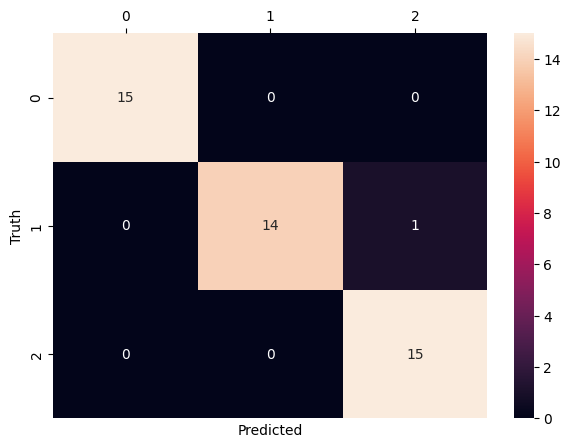

In [16]:
#Visualising the condfusion matrix in heat map
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
ax = sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
ax.xaxis.tick_top()
